## LGBM & XGBM

#### Exploratory Data Analysis (EDA):

1. Load the Titanic dataset using Python's pandas library.
2. Check for missing values.
3. Explore data distributions using histograms and box plots.
4. Visualize relationships between features and survival using scatter plots and bar plots.


#### 2. Data Preprocessing:

1. Impute missing values.
2. Encode categorical variables using one-hot encoding or label encoding. 
3. If needed you can apply more preprocessing methods on the given dataset.


#### 3. Building Predictive Models:

1.Split the preprocessed dataset into training and testing sets.

2.Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

3.Build predictive models using LightGBM and XGBoost algorithms.

4.Train the models on the training set and evaluate their performance on the testing set.

5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


#### 4. Comparative Analysis:

1. Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.


2. Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_data = pd.read_csv('Titanic_train.csv')


In [2]:
# Check for missing values
print(titanic_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Age Distribution')

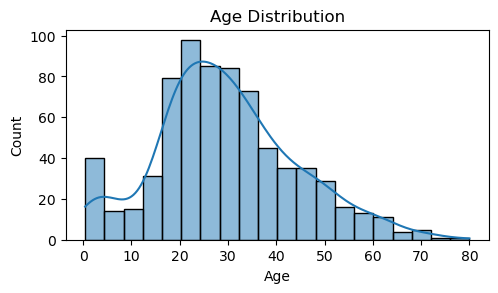

In [3]:
# Explore data distributions using histograms -

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(titanic_data['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Number of Parents/Children Aboard')

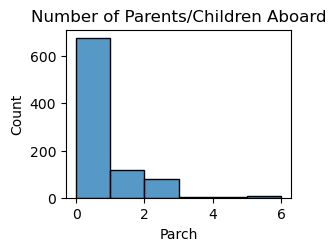

In [4]:
plt.subplot(2, 2, 4)
sns.histplot(titanic_data['Parch'], bins=6, kde=False)
plt.title('Number of Parents/Children Aboard')


Text(0.5, 1.0, 'Number of Siblings/Spouses Aboard')

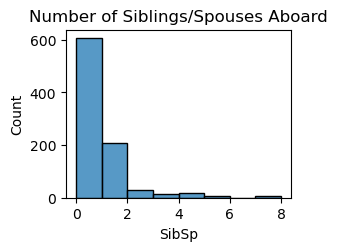

In [6]:
plt.subplot(2, 2, 3)
sns.histplot(titanic_data['SibSp'], bins=8, kde=False)
plt.title('Number of Siblings/Spouses Aboard')


In [7]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Fare Distribution by Passenger Class')

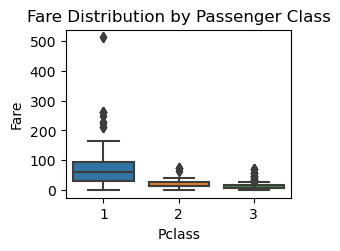

In [8]:
# Explore data distributions using and box plots -

plt.subplot(2, 2, 2)
sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('Fare Distribution by Passenger Class')

C:\Users\prana\AppData\Local\Temp\ipykernel_23096\1049367541.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_data, ci=None)


Text(0.5, 1.0, 'Survival Rate by Passenger Class')

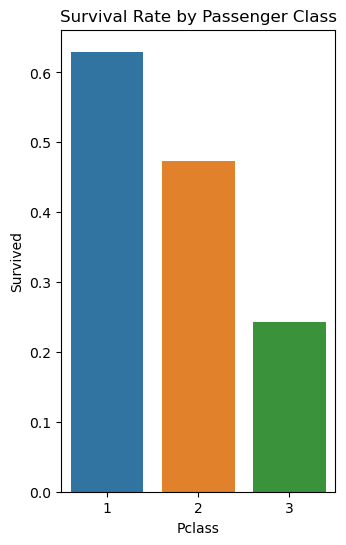

In [9]:
# Visualize relationships between features and survival
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=titanic_data, ci=None)
plt.title('Survival Rate by Passenger Class')


C:\Users\prana\AppData\Local\Temp\ipykernel_23096\2021432511.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_data, ci=None)


Text(0.5, 1.0, 'Survival Rate by Sex')

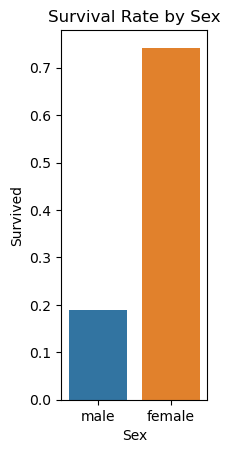

In [10]:
plt.subplot(1, 3, 2)
sns.barplot(x='Sex', y='Survived', data=titanic_data, ci=None)
plt.title('Survival Rate by Sex')


C:\Users\prana\AppData\Local\Temp\ipykernel_23096\2877083433.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=titanic_data, ci=None)


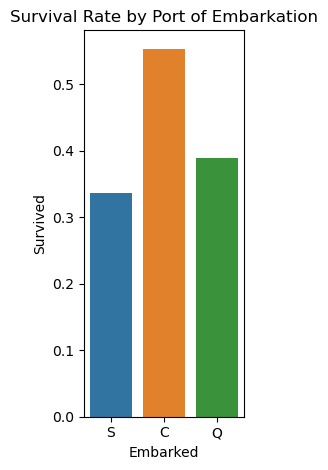

In [11]:
plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=titanic_data, ci=None)
plt.title('Survival Rate by Port of Embarkation')

plt.tight_layout()
plt.show()


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Impute missing values for 'Age' and 'Fare' using median
imputer = SimpleImputer(strategy='median')
titanic_data[['Age', 'Fare']] = imputer.fit_transform(titanic_data[['Age', 'Fare']])


In [13]:
# Encode categorical variables 'Sex', 'Embarked' using OneHotEncoder
encoder = OneHotEncoder()
titanic_data_encoded = pd.DataFrame(encoder.fit_transform(titanic_data[['Sex', 'Embarked']]).toarray(), 
                                     columns=encoder.get_feature_names_out(['Sex', 'Embarked']))


In [14]:
# Drop the original categorical columns and concatenate the encoded ones
titanic_data = titanic_data.drop(['Sex', 'Embarked'], axis=1)
titanic_data = pd.concat([titanic_data, titanic_data_encoded], axis=1)

# Display the preprocessed data
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_female  Sex_male  Embarked_C  \
0         A/5 21171   7.2500   NaN         0.0       1.0         0.0   
1          PC 17599  71.2833   C85         1.0       0.0         1.0   
2  STON/O2. 3101282   7.9250   NaN         1.0       0.0         0.0   
3            113803  53.1000  C123    

In [15]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Split the dataset into training and testing sets
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


LightGBM - Accuracy: 0.8268, Precision: 0.8028, Recall: 0.7703, F1-score: 0.7862
XGBoost - Accuracy: 0.7933, Precision: 0.7467, Recall: 0.7568, F1-score: 0.7517


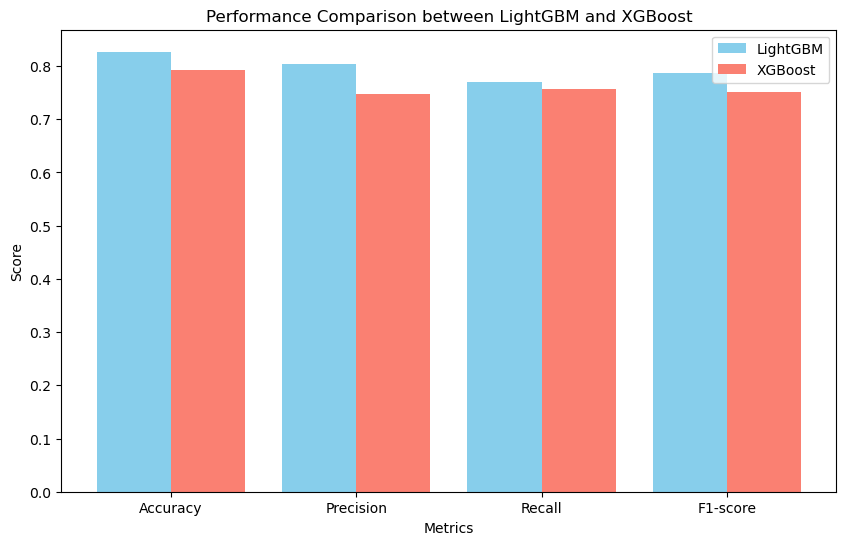

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate the models
lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1 = evaluate_model(lgbm_model, X_test, y_test)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(xgb_model, X_test, y_test)

# Print the performance metrics
print("LightGBM - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1))
print("XGBoost - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
    xgb_accuracy, xgb_precision, xgb_recall, xgb_f1))

# Visualize the results
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lgbm_scores = [lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1]
xgb_scores = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, lgbm_scores, width=0.4, label='LightGBM', color='skyblue')
plt.bar([i + 0.4 for i in x], xgb_scores, width=0.4, label='XGBoost', color='salmon')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Comparison between LightGBM and XGBoost')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.show()
